<a href="https://colab.research.google.com/github/LuciaSS27/Proyecto-Datos/blob/main/Proyecto_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **TRABAJO FINAL DATOS**



In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab
from sklearn.preprocessing import PolynomialFeatures
import scipy.io

**1. Análisis exploratorio del conjunto de datos**

Carga de datos

In [4]:
data = pd.read_csv('politicES_phase_2_test_codalab.csv')
print("Número de instancias:")
print(data.shape[0])
print("Número de variables:")
print(data.shape[1])

Número de instancias:
43760
Número de variables:
6


In [5]:
print("Variables:")
print(data[:0])

Variables:
Empty DataFrame
Columns: [label, gender, profession, ideology_binary, ideology_multiclass, tweet]
Index: []


In [6]:
print(data.iloc[1772].values)

['0c92efbe64110f10ba794603824cd186' 'male' 'politician' 'left'
 'moderate_left'
 '⚓ Presentaré, mañana en la UE, la estrategia para consolidar la [HASHTAG] como sistema sostenible de producción de . ⚓ Objetivos:. 🔹 Fortalecimiento de las organizaciones de productores. 🔹 Bienestar animal. 🔹 Incremento de mujeres en esta actividad']


In [7]:
print(data.isnull().any())

label                  False
gender                 False
profession             False
ideology_binary        False
ideology_multiclass    False
tweet                  False
dtype: bool




*   Estadística de los datos




30480


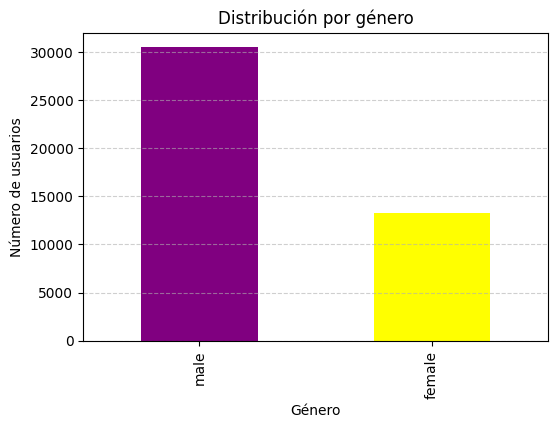

In [8]:
#Género
gender = data['gender']
count= data['gender'].value_counts()
print(count.male)
#Gráfica
plt.figure(figsize=(6,4))
count.plot(kind='bar', color=['purple', 'yellow'])

plt.title("Distribución por género")
plt.xlabel("Género")
plt.ylabel("Número de usuarios")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

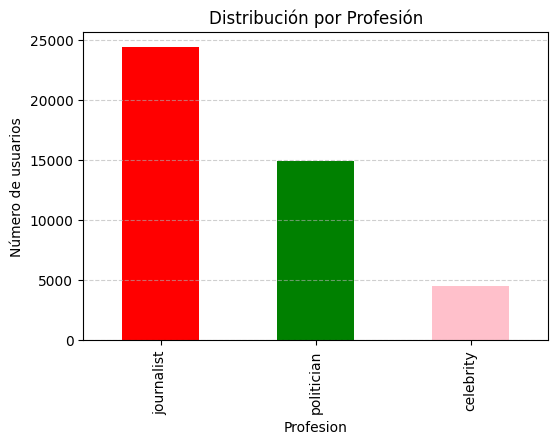

In [9]:
#Profesión
Profession = data['profession']
count= data['profession'].value_counts()
#Gráfica
plt.figure(figsize=(6,4))
count.plot(kind='bar', color=['red', 'green','pink'])

plt.title("Distribución por Profesión")
plt.xlabel("Profesion")
plt.ylabel("Número de usuarios")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

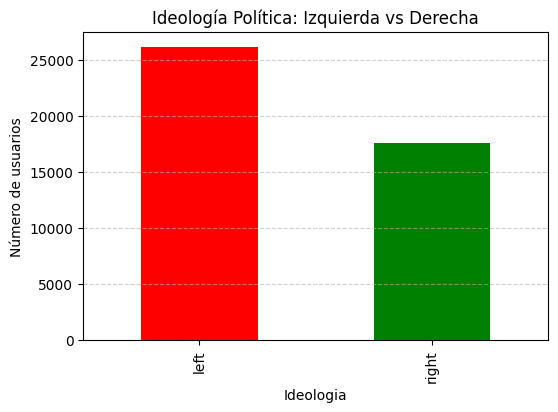

In [11]:
#ideology_binary
Ideologia = data['ideology_binary']
count= data['ideology_binary'].value_counts()
#Gráfica
plt.figure(figsize=(6,4))
count.plot(kind='bar', color=['red', 'green'])

plt.title("Ideología Política: Izquierda vs Derecha")
plt.xlabel("Ideologia")
plt.ylabel("Número de usuarios")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

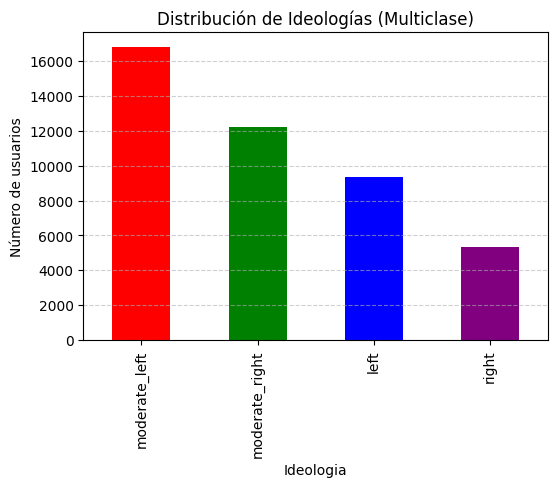

In [15]:
#ideology_multiclass
Ideologia_multi= data['ideology_multiclass']
count= data['ideology_multiclass'].value_counts()
#Gráfica
plt.figure(figsize=(6,4))
count.plot(kind='bar', color=['red', 'green','blue','purple'])

plt.title("Distribución de Ideologías (Multiclase)")
plt.xlabel("Ideologia")
plt.ylabel("Número de usuarios")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

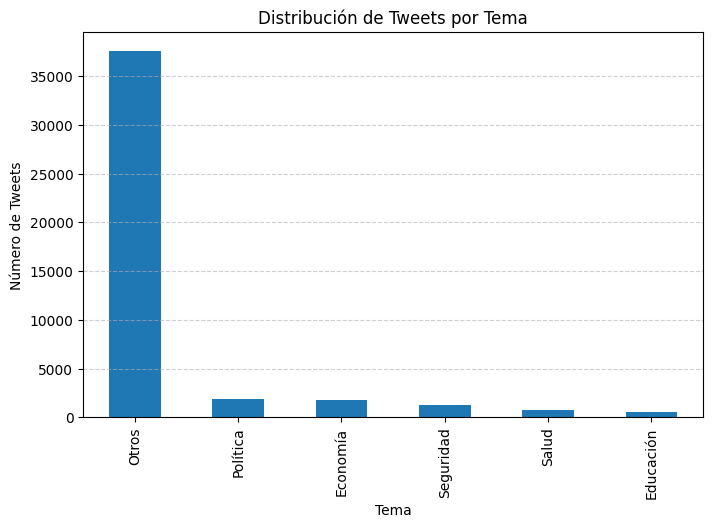

In [19]:
#tweet
temas = {
    "Economía": ["economía", "inflación", "precio", "salario", "pobreza", "impuestos"],
    "Salud": ["covid", "salud", "hospital", "vacuna"],
    "Educación": ["educación", "escuela", "universidad", "estudiante"],
    "Seguridad": ["seguridad", "violencia", "delito", "policía", "crimen"],
    "Política": ["elección", "voto", "campaña", "político", "partido"],
}
def clasificar_tema(texto):
    texto = texto.lower()
    for tema, palabras in temas.items():
        if any(palabra in texto for palabra in palabras):
            return tema
    return "Otros"
data["tema"] = data["tweet"].apply(clasificar_tema)
conteo = data["tema"].value_counts()

plt.figure(figsize=(8,5))
conteo.plot(kind='bar')

plt.title("Distribución de Tweets por Tema")
plt.xlabel("Tema")
plt.ylabel("Número de Tweets")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
